In [36]:
using DataFrames, CSV #packages for label the csv data in julia
using Statistics,StatsBase
df_untreated = CSV.read("untreated.csv",DataFrame)
df_treated = CSV.read("treated.csv",DataFrame)
original_untreated = select(df_untreated,"Young's Modulus [Pa]","Contact Point [m]")
original_treated = select(df_treated,"Young's Modulus [Pa]","Contact Point [m]")
rename!(original_untreated,1=>:youngs_modulus,2=>:contact_point)
rename!(original_treated,1=>:youngs_modulus,2=>:contact_point)
#import the raw datas

Row,youngs_modulus,contact_point
,Float64?,Float64?
1,4.57316e6,-1.98089e-7
2,4.71056e6,-1.90359e-7
3,4.90721e6,-1.86839e-7
4,4.65619e6,-1.967e-7
5,2.94479e6,-1.5747e-7
6,4.3264e6,-1.95542e-7
7,3.94327e6,-2.06331e-7
8,3.84156e6,-1.91314e-7
9,5.85136e6,-2.23536e-7


(1221, 2)

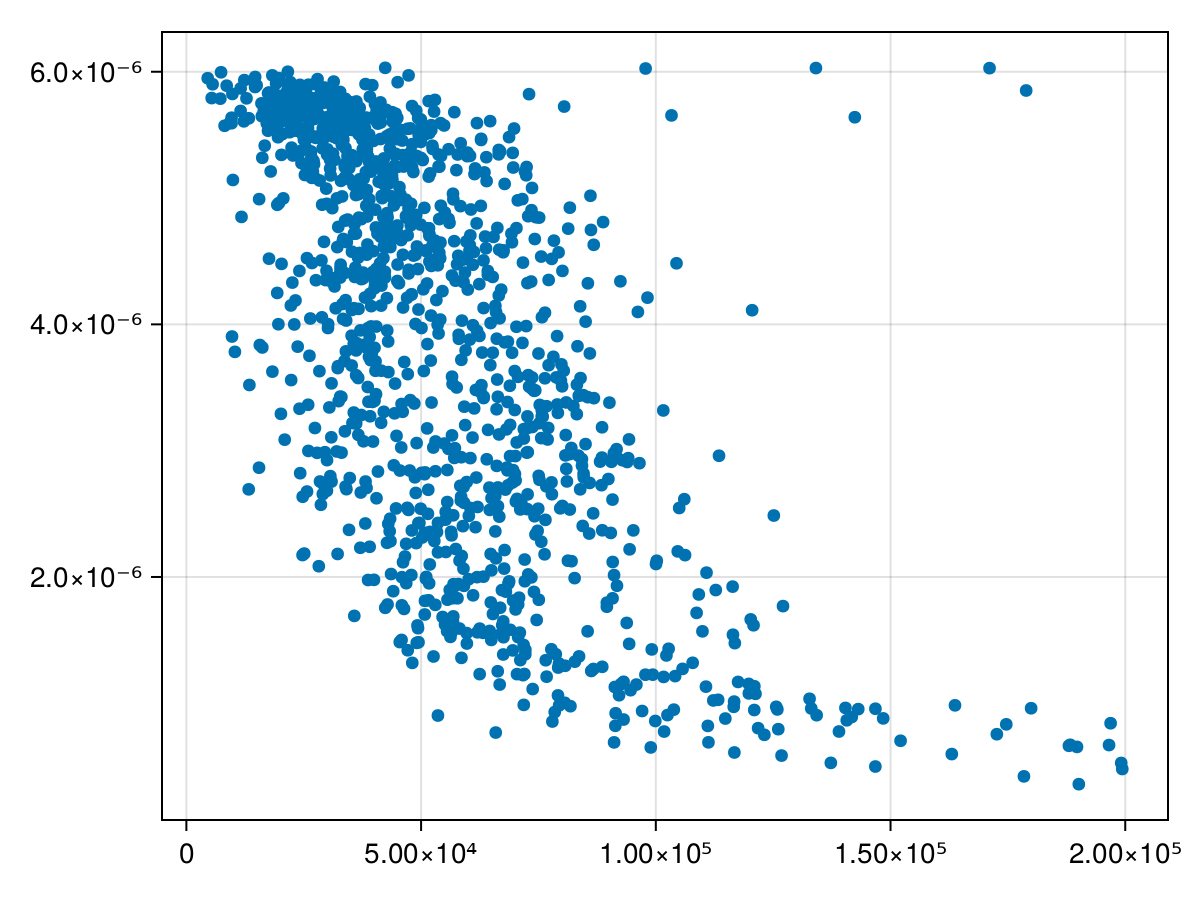

CairoMakie.Screen{IMAGE}


In [50]:
using CairoMakie, Colors
CairoMakie.activate!()

#fig_tmp = Figure()
#ax_tmp = Axis(fig_tmp[1,1])
#tmp_untreated = subset(original_untreated,:youngs_modulus => ByRow(<(2.0e5));skipmissing= true)
#display(size(tmp_untreated))
#hist!(ax_tmp,tmp_untreated[!,:youngs_modulus],bins = 200)
#scatter!(tmp_untreated[!,:youngs_modulus],tmp_untreated[!,:contact_point])
#display(fig_tmp)


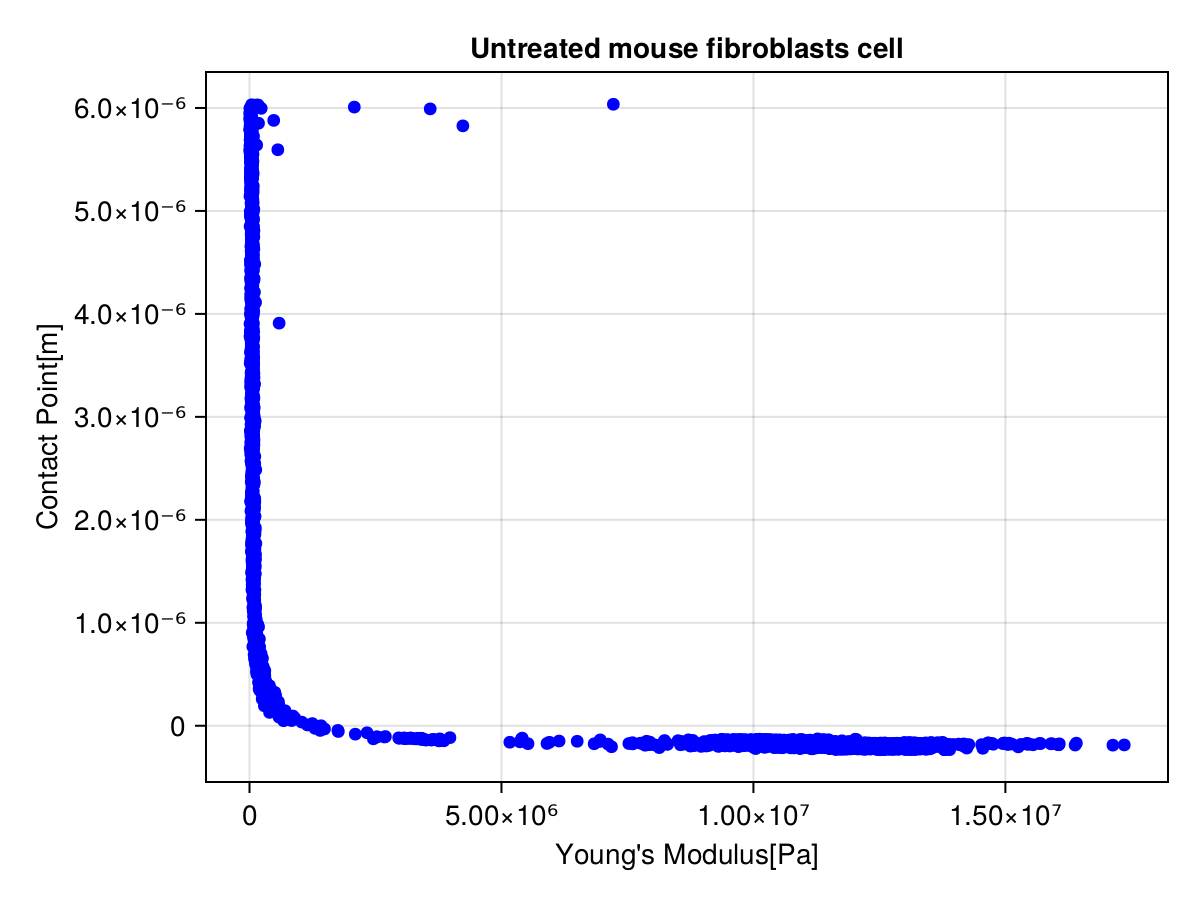

CairoMakie.Screen{IMAGE}


In [30]:
fig1 = Figure()
ax1 = Axis(fig1[1,1],
    title = "Untreated mouse fibroblasts cell",
    xlabel = "Young's Modulus[Pa]",
    ylabel = "Contact Point[m]")
scatter!(ax1,original_untreated[!,:youngs_modulus],original_untreated[!,:contact_point],color =:blue)
display(fig1)
save("ym-cp-curve-untreated.png",fig1)

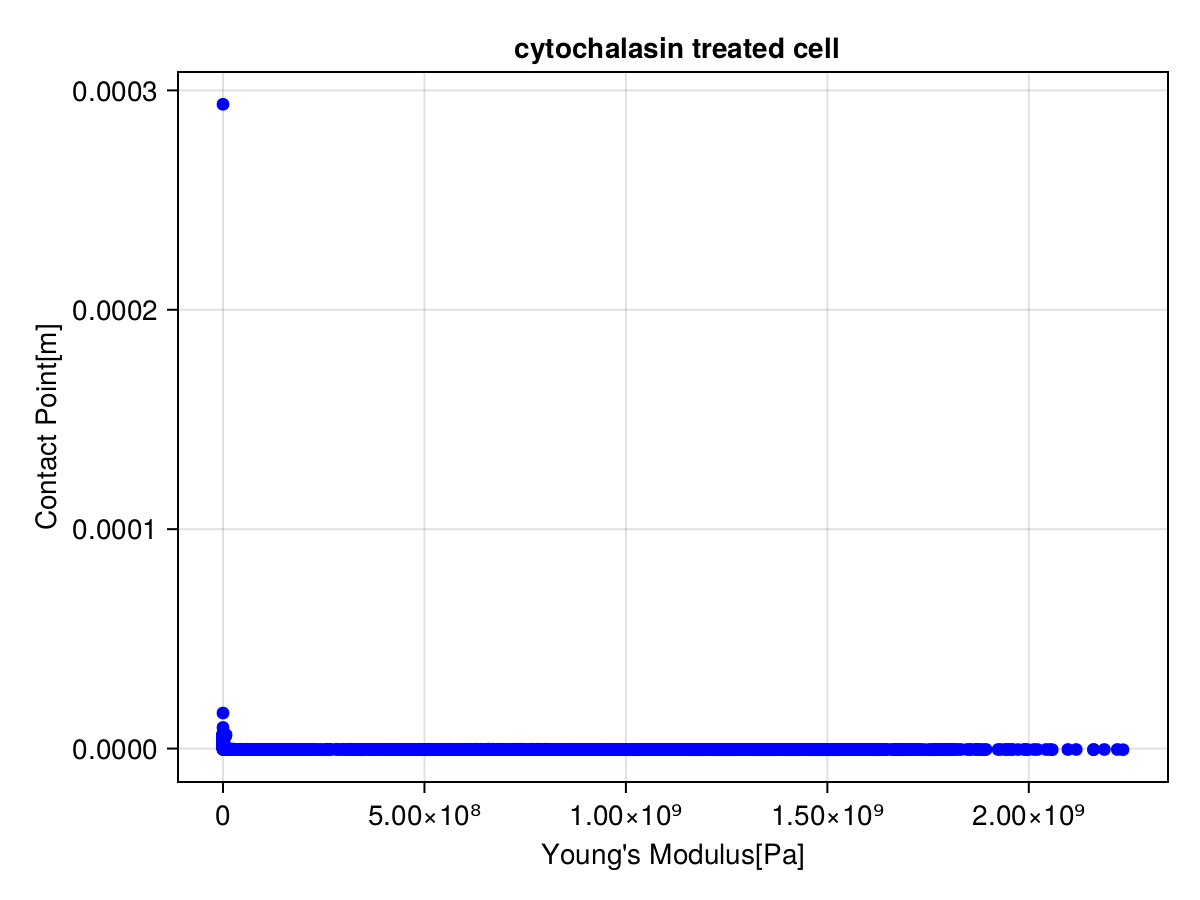

CairoMakie.Screen{IMAGE}


In [17]:
fig2 = Figure()
ax2 = Axis(fig2[1,1],
    title = " cytochalasin treated cell",
    xlabel = "Young's Modulus[Pa]",
    ylabel = "Contact Point[m]")
scatter!(ax2,original_treated[!,:youngs_modulus],original_treated[!,:contact_point],color =:blue)
display(fig2)
save("original-ym-cp-curve-treated.png",fig2)

(4007, 2)

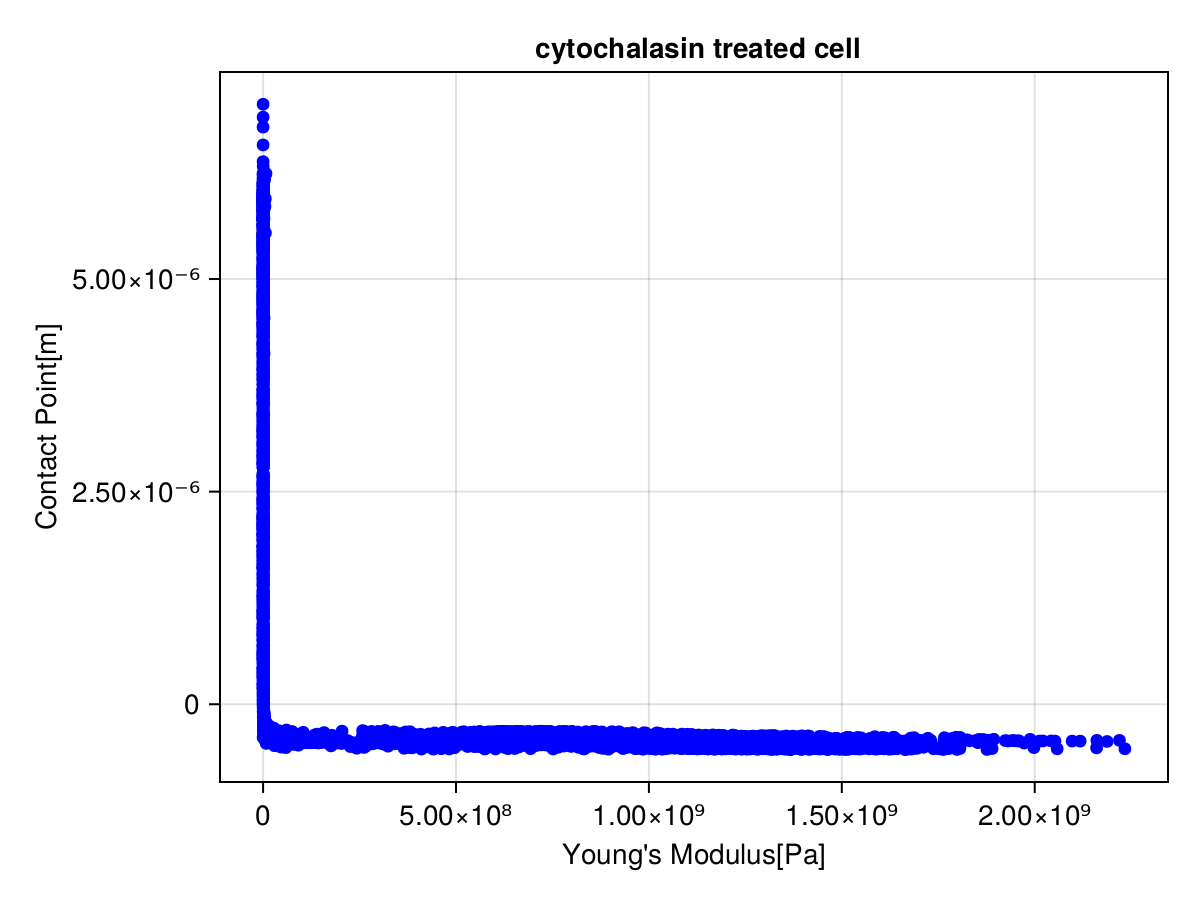

CairoMakie.Screen{IMAGE}


In [56]:
filtered_treated = subset(original_treated,:contact_point => ByRow(<(8.0e-6));skipmissing = true)
display(size(filtered_treated))
fig3 = Figure()
ax3 = Axis(fig3[1,1],
    title = " cytochalasin treated cell",
    xlabel = "Young's Modulus[Pa]",
    ylabel = "Contact Point[m]")
scatter!(ax3,filtered_treated[!,:youngs_modulus],filtered_treated[!,:contact_point],color =:blue)
#hist!(ax3,filtered_treated[!,:youngs_modulus],bins = 200)
display(fig3)
save("filtered-ym-cp-curve-untreated.png",fig3)

In [90]:
cutoff_value_untreated = 2.0e-6
cutoff_value_treated = 2.0e-6
cutoff_untreated = subset(original_untreated, :contact_point => ByRow(<(cutoff_value_untreated)); skipmissing = true)
cutoff_treated = subset(filtered_treated, :contact_point => ByRow(<(cutoff_value_treated)); skipmissing = true )

Row,youngs_modulus,contact_point
,Float64?,Float64?
1,4.57316e6,-1.98089e-7
2,4.71056e6,-1.90359e-7
3,4.90721e6,-1.86839e-7
4,4.65619e6,-1.967e-7
5,2.94479e6,-1.5747e-7
6,4.3264e6,-1.95542e-7
7,3.94327e6,-2.06331e-7
8,3.84156e6,-1.91314e-7
9,5.85136e6,-2.23536e-7


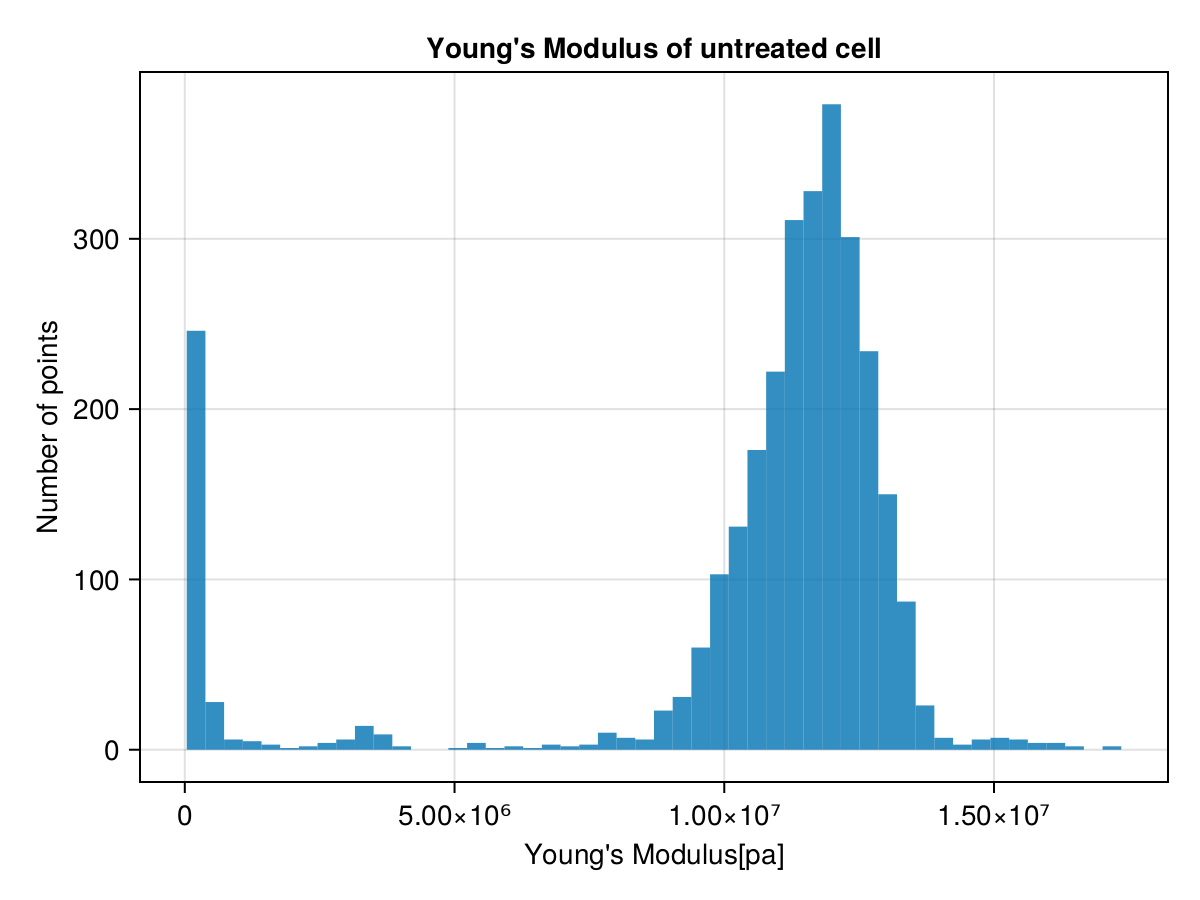

CairoMakie.Screen{IMAGE}


In [120]:
fig4 = Figure()
ax4 = Axis(fig4[1,1],
            title = "Young's Modulus of untreated cell",
            xlabel = "Young's Modulus[pa]",
            ylabel = "Number of points")
tmp_cutoff_untreated = subset(cutoff_untreated, :youngs_modulus => ByRow(<(2.0e5));skipmissing = true)
hist!(ax4,cutoff_untreated[!,:youngs_modulus], bins = 50)
save("histogram_of_untreated.png",fig4)
display(fig4)

(466, 2)

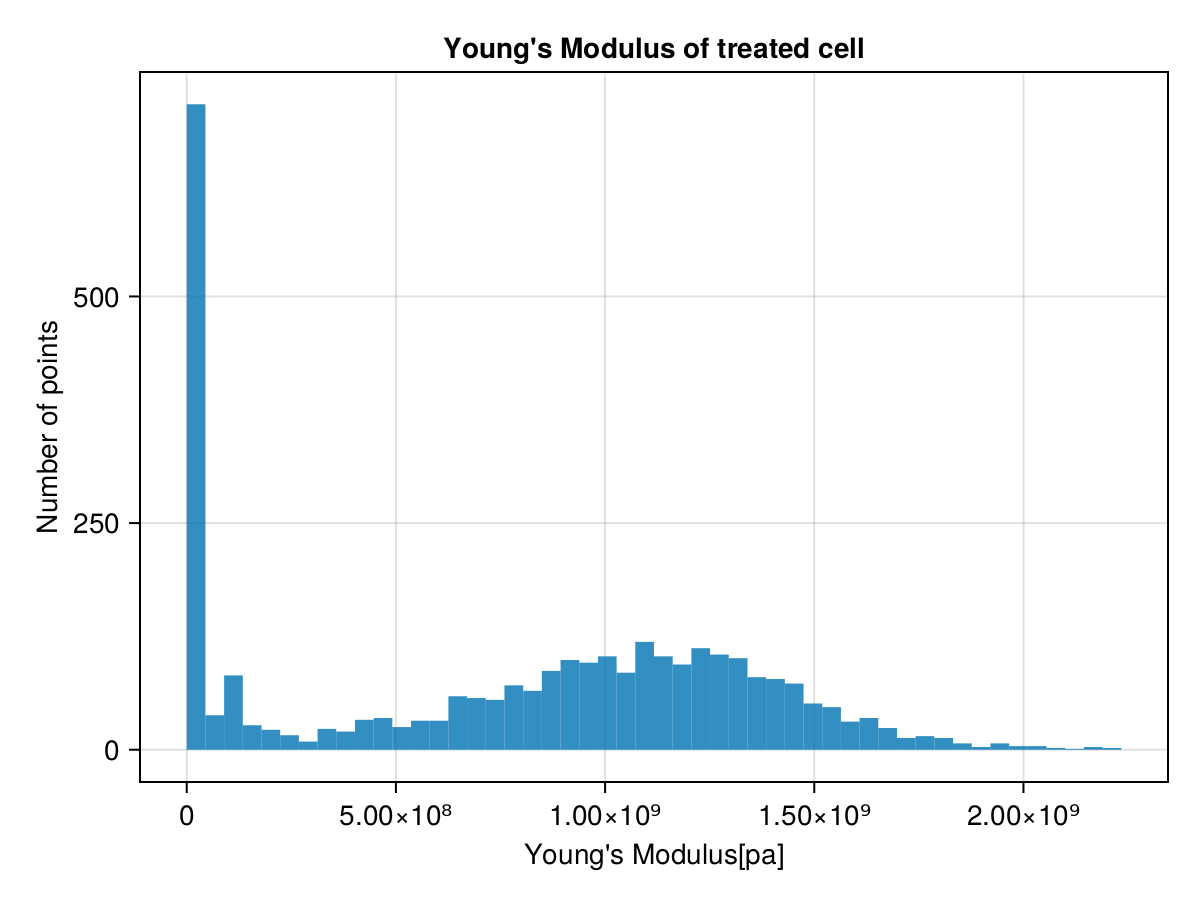

CairoMakie.Screen{IMAGE}


In [117]:
fig5 = Figure()
ax5 = Axis(fig5[1,1],
            title = "Young's Modulus of treated cell",
            xlabel = "Young's Modulus[pa]",
            ylabel = "Number of points")
tmp_cutoff_treated = subset(cutoff_treated,:youngs_modulus => ByRow(<(3.0e5));skipmissing = true)
display(size(tmp_cutoff_treated))
hist!(ax5, cutoff_treated[!,:youngs_modulus], bins = 50)
save("histogram_of_treated.png",fig5)
display(fig5)

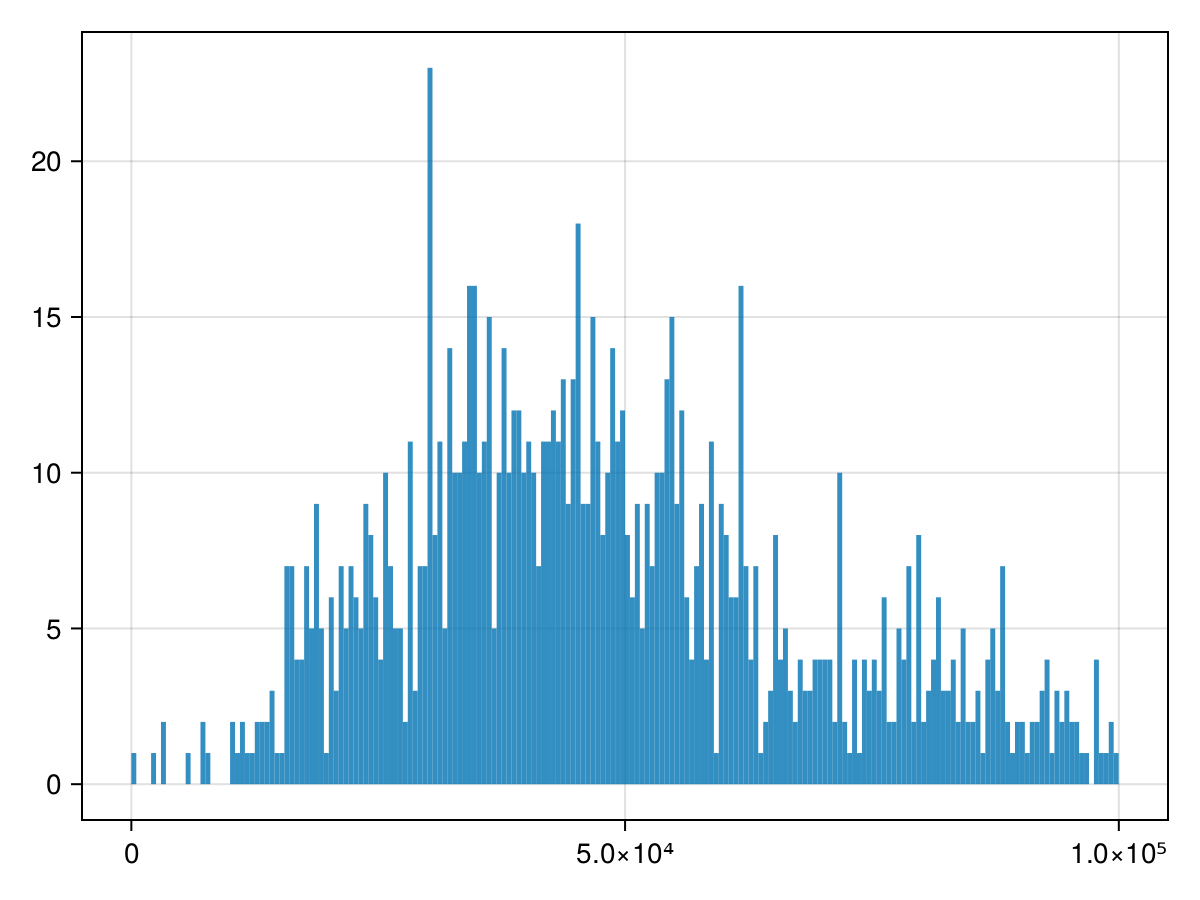

CairoMakie.Screen{IMAGE}


In [181]:
ym_untreated = subset(original_untreated, :youngs_modulus => ByRow(<(1.0e5));skipmissing = true)
ym_untreated = dropmissing(ym_untreated)
ym_untreated = ym_untreated[!,:youngs_modulus]
ym_treated = subset(filtered_treated, :youngs_modulus => ByRow(<(1.0e5));skipmissing = true)
ym_treated = dropmissing(ym_treated)
ym_treated = ym_treated[!,:youngs_modulus]
x_untreated = range(1,stop = 1,length = length(ym_untreated))
x_treated = range(2,stop = 2,length = length(ym_treated))
tmpfig = Figure()
tmpax = Axis(tmpfig[1,1])
hist!(tmpax,ym_treated,bins = 200)
display(tmpfig)

49378.22318381707
47965.147932291824
46836.7
45306.3
20651.336848642273
20428.00596073614


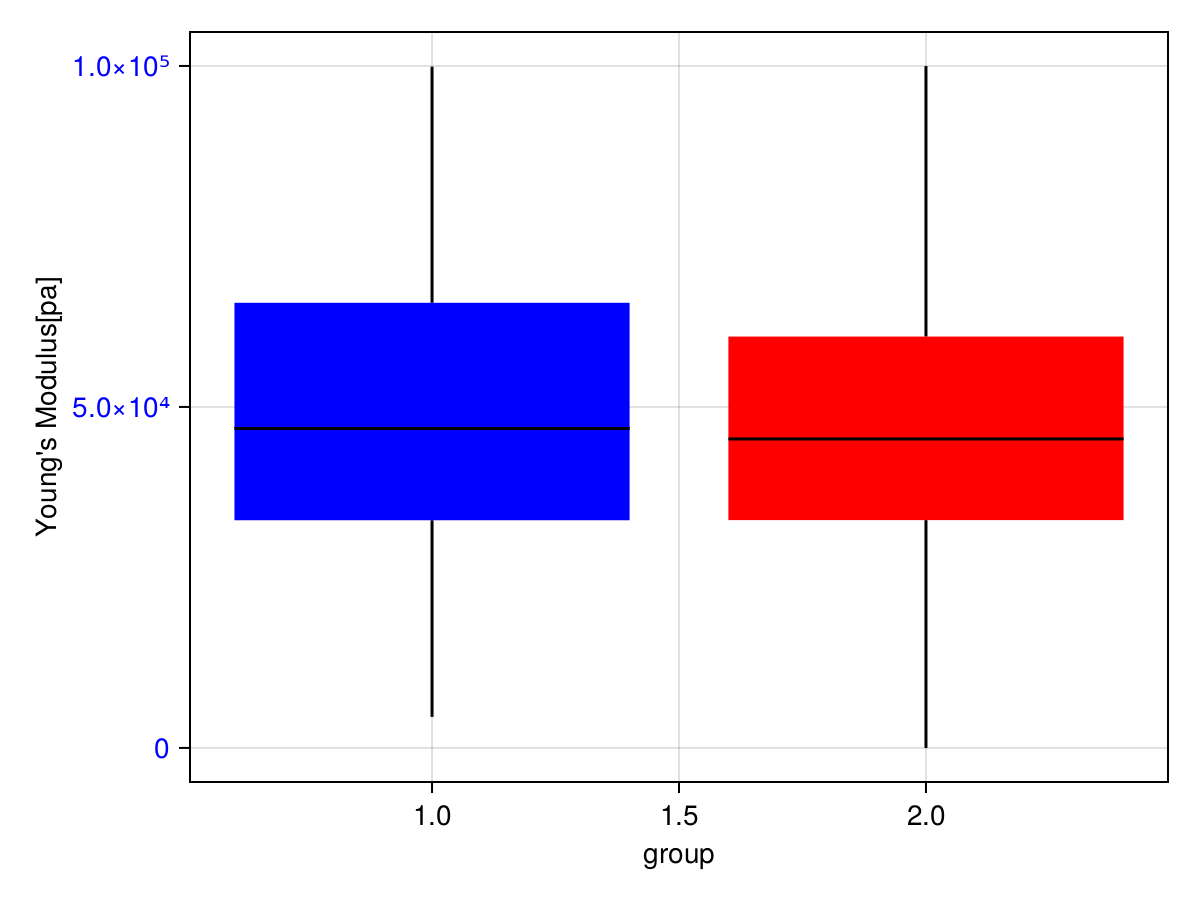

CairoMakie.Screen{IMAGE}


In [183]:
fig6 = Figure()
ax6 = Axis(fig6[1,1],xlabel = "group",ylabel = "Young's Modulus[pa]",yticklabelcolor =:blue)
boxplot!(ax6,x_untreated,ym_untreated,color =:blue,title = "untreated cell")
boxplot!(ax6,x_treated,ym_treated,color =:red,title = "treated cell")
println(mean(ym_untreated))
println(mean(ym_treated))
println(median(ym_untreated))
println(median(ym_treated))
println(std(ym_untreated))
println(std(ym_treated))
save("boxplot.png",fig6)
display(fig6)

In [184]:
using HypothesisTests
test = EqualVarianceTTest(ym_untreated,ym_treated)

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          1413.08
    95% confidence interval: (-290.6, 3117.0)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1040

Details:
    number of observations:   [1137,1100]
    t-statistic:              1.6265592256063293
    degrees of freedom:       2235
    empirical standard error: 868.7511830370006
